In [1]:
import sys
import os
# Append the library path to PYTHONPATH, so library can be imported.
sys.path.append(os.path.dirname(os.getcwd()))
import datetime
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from library import common as cm

In [2]:
%run setup.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style='darkgrid')

In [3]:
cols = ['FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=False_VIX=False_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False',
        'FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=False_VIX=True_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False',
        'FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=True_VIX=False_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False',
        'FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=True_VIX=True_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False']

In [4]:
rows = ['Regression/BS_Benchmark', 
        'Regression/Delta_Vega_Vanna', 
        'Network/Delta_Vega']

In [5]:
df_dirs = pd.DataFrame(columns=cols, index=rows)
for x, y in list(itertools.product(rows, cols)):
    df_dirs.loc[x, y] = f'{DATA_DIR}Result/{y}/{x}/'

In [6]:
kws = [('Regression/BS_Benchmark', 'Black-Scholes', 'o', -0.1, sns.color_palette()[0]),
       ('Regression/Delta_Vega_Vanna', 'Delta-Vega-Vanna regression', 'x', -0.05, sns.color_palette()[1]),
       ('Network/Delta_Vega',  r'ANN $(\Delta_{\rm BS};\, \mathcal{V}_{\rm BS};\, \tau)$', '^', 0.1, sns.color_palette()[3])]

In [7]:
aggregating = 'mean'
measure = 'mse'

In [8]:
inspector = cm.Inspector()
df_res = inspector.evalPnls(df_dirs, aggregating=aggregating, measure=measure, op_type=None)

In [9]:
df_res

setup                       FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=False_VIX=False_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False  \
value                                                                                                                                                   Absolute   
Regression/BS_Benchmark                                                  0.665                                                                                     
Regression/Delta_Vega_Vanna                                              0.541                                                                                     
Network/Delta_Vega                                                       0.567                                                                                     

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna  -18.69   
Network/Delta_Vega           -14.67   

setup                       FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=False_VIX=True_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False  \
value                                                                                                                                                  Absolute   
Regression/BS_Benchmark                                                  0.665                                                                                    
Regression/Delta_Vega_Vanna                                              0.543                                                                                    
Network/Delta_Vega                                                       0.642                                                                                    

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna  -18.29   
Network/Delta_Vega            -3.50   

setup                       FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=True_VIX=False_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False  \
value                                                                                                                                                  Absolute   
Regression/BS_Benchmark                                                  0.663                                                                                    
Regression/Delta_Vega_Vanna                                              0.512                                                                                    
Network/Delta_Vega                                                       0.526                                                                                    

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna  -22.80   
Network/Delta_Vega           -20.69   

setup                       FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=True_VIX=True_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False  \
value                                                                                                                                                 Absolute   
Regression/BS_Benchmark                                                  0.663                                                                                   
Regression/Delta_Vega_Vanna                                              0.507                                                                                   
Network/Delta_Vega                                                       0.524                                                                                   

setup                                
value                       %Change  
Regression/BS_Benchmark        0.00  
Regression/Delta_Vega_Vanna  -23.4

Text(0.5, 1.0, 'Absolute value')

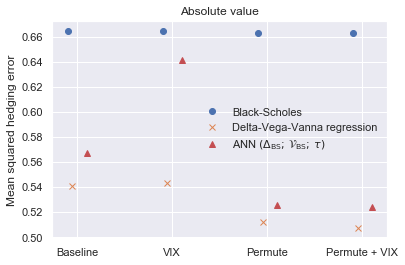

In [10]:
res_abs = df_res.xs('Absolute', level=1, axis=1)

for col in kws:
    plt.plot(np.arange(1, 5)+col[3], res_abs.loc[col[0]], marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.xticks(np.arange(1, 5), ('Baseline', 'VIX', 'Permute', 'Permute + VIX'))
plt.ylabel('Mean squared hedging error')
plt.title('Absolute value')

Text(0.5, 1.0, 'S&P 500 (1 day)')

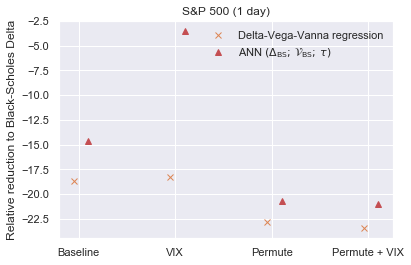

In [11]:
res_rela = df_res.xs('%Change', level=1, axis=1)
for col in kws[1:]:
    plt.plot(np.arange(1, 5)+col[3], res_rela.loc[col[0]], marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.xticks(np.arange(1, 5), ('Baseline', 'VIX', 'Permute', 'Permute + VIX'))
plt.ylabel('Relative reduction to Black-Scholes Delta')
plt.title('S&P 500 (1 day)')

#### Baseline
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'baseline' experiment.

In [12]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[0]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[0]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[0]}/Network/Delta_Vega/'}
localins = cm.LocalInspector(dirs_dict)

localins.load_real_pnl()
baseline = localins.compare_period()[['Regression/BS_Benchmark','Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] 
bs_tmp = baseline['Regression/BS_Benchmark'].values[:, np.newaxis]
# calculate the relative percentage change of the two models comapred to the BS-Delta

Text(0, 0.5, 'Mean squared hedging error')

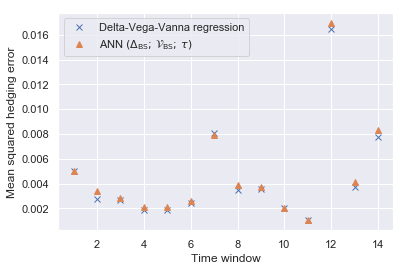

In [13]:
for x in kws[1:]:
    plt.plot(range(1, 15), baseline[x[0]], linewidth=0, marker=x[2], label=x[1])
plt.legend()
plt.xlabel('Time window')
plt.ylabel('Mean squared hedging error')

Text(0, 0.5, 'Percentage')

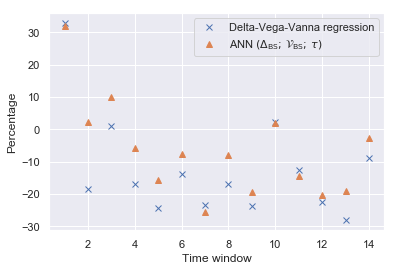

In [14]:
base_rela = (baseline[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp
for x in kws[1:]:
    plt.plot(range(1, 15), base_rela[x[0]]*100, linewidth=0, marker=x[2], label=x[1])
plt.legend()
plt.xlabel('Time window')
plt.ylabel('Percentage')

#### 'VIX' experiment
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'VIX' experiment.

In [15]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[1]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[1]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[1]}/Network/Delta_Vega/'}

Text(0, 0.5, 'Percentage improvement')

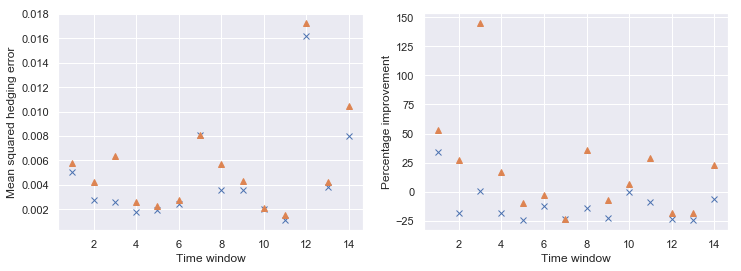

In [16]:
localins = cm.LocalInspector(dirs_dict)
localins.load_real_pnl()

res = localins.compare_period()[['Regression/BS_Benchmark', 'Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for x in kws[1:]:
    axes[0].plot(range(1, 15), res[x[0]], linewidth=0, marker=x[2], label=x[1])
    
axes[0].set_xlabel('Time window')
axes[0].set_ylabel('Mean squared hedging error')


bs_tmp = res['Regression/BS_Benchmark'].values[:, np.newaxis]
tmp = (res[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp
for x in kws[1:]:
    axes[1].plot(range(1, 15), tmp[x[0]]*100, linewidth=0, marker=x[2], label=x[1])
axes[1].set_xlabel('Time window')
axes[1].set_ylabel('Percentage improvement')

#### 'Permute' experiment
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'Permutation' experiment.

In [17]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[2]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[2]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[2]}/Network/Delta_Vega/'}

In [18]:
inspector = cm.Inspector()
res = inspector.eval_single_exp(dirs_dict, measure=measure)

In [19]:
res

,Regression/BS_Benchmark,Regression/Delta_Vega_Vanna,Network/Delta_Vega
0,0.006612,0.005114,0.005280
1,0.006641,0.005117,0.005231


Text(0.5, 1.0, 'Absolute value')

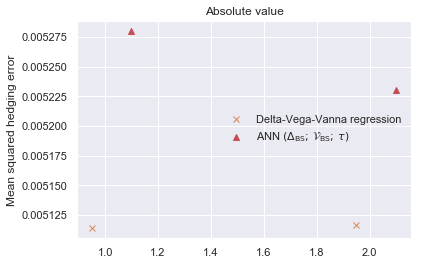

In [20]:
""" This figure plots the MSHE in 5 permutations """
for col in kws[1:]:
    plt.plot(np.arange(1, NUM_PERMUTE+1)+col[3], res.loc[:, col[0]], marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.ylabel('Mean squared hedging error')
plt.title('Absolute value')

Text(0.5, 1.0, 'Relative')

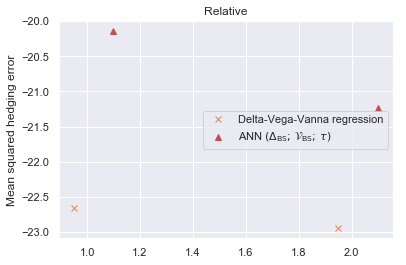

In [21]:
" This plots the percentage improvement of MSHE in 5 permutations"
for col in kws[1:]:
    y = (res[col[0]] - res['Regression/BS_Benchmark']) / res['Regression/BS_Benchmark']
    plt.plot(np.arange(1, NUM_PERMUTE+1)+col[3], y*100, marker=col[2], linewidth=0, label=col[1], color=col[4])
plt.legend(frameon=True)
plt.ylabel('Mean squared hedging error')
plt.title('Relative')

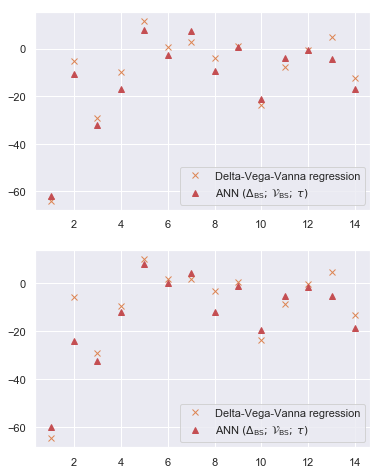

In [22]:
"""
This plots the change in the percentage improvement of the two statistical models 
compared to the BS-Delta, window by window in each of the 5 permutations.
"""

localins = cm.LocalInspector(dirs_dict)
three_cols = ['Regression/BS_Benchmark', 'Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']
df_rela_diff = pd.DataFrame(np.zeros((14, 2)), 
                            index=range(0, 14), columns=three_cols[1:])

df_abs = pd.DataFrame(np.zeros((14, 3)), index=range(0, 14), columns=three_cols)
fig, axes = plt.subplots(ncols=1, nrows=NUM_PERMUTE, figsize=(6, 4*NUM_PERMUTE)) 

for i in range(NUM_PERMUTE):
    localins.load_real_pnl(idx=i)
    res = localins.compare_period()[three_cols]
    bs_tmp = res['Regression/BS_Benchmark'].values[:, np.newaxis]
    permute_rela = (res[three_cols[1:]] - bs_tmp) / bs_tmp
    
    df_rela_diff += permute_rela - base_rela
    y = (permute_rela - base_rela)*100
    for x in kws[1:]:
        if (NUM_PERMUTE == 1):
            axes.plot(np.arange(1, 15), y[x[0]], marker=x[2], linewidth=0, label=x[1], color=x[4])
            axes.legend()
        else:
            axes[i].plot(np.arange(1, 15), y[x[0]], marker=x[2], linewidth=0, label=x[1], color=x[4])
            axes[i].legend()
    df_abs += res

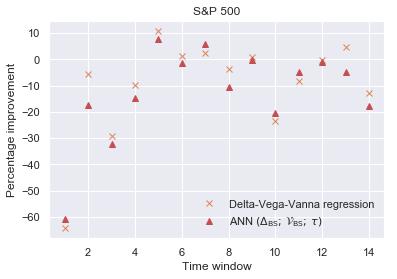

In [23]:
" The average of the 5 plots above. "
avg = df_rela_diff / NUM_PERMUTE
for x in kws[1:]:
    plt.plot(range(1, len(avg)+1), avg[x[0]]*100, marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Percentage improvement')
plt.title('S&P 500')

rela_diff_avg_pmt = avg

Text(0.5, 1.0, 'S&P 500')

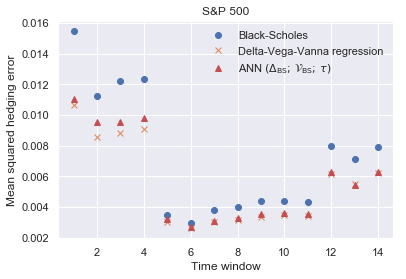

In [24]:
" The absolute value of the average of the 5 permutations. "
avg = df_abs / NUM_PERMUTE
for x in kws:
    plt.plot(range(1, len(avg)+1), avg[x[0]], marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Mean squared hedging error')
plt.title('S&P 500')

#### 'Permute + VIX' experiment

In [25]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[3]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[3]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[3]}/Network/Delta_Vega/'}

In [26]:
inspector = cm.Inspector()
res = inspector.eval_single_exp(dirs_dict, measure=measure)

In [27]:
res

,Regression/BS_Benchmark,Regression/Delta_Vega_Vanna,Network/Delta_Vega
0,0.006612,0.005070,0.005261
1,0.006641,0.005073,0.005211


Text(0.5, 1.0, 'Absolute value')

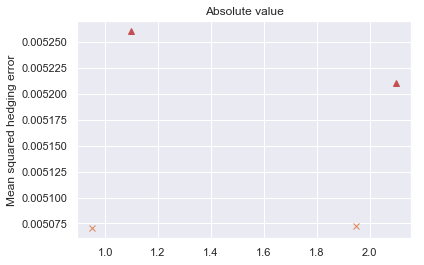

In [28]:
for col in kws[1:]:
    plt.plot(np.arange(1, NUM_PERMUTE+1)+col[3], res.loc[:, col[0]], marker=col[2], linewidth=0, label=col[1], c=col[4])
#plt.legend(frameon=False)
plt.ylabel('Mean squared hedging error')
plt.title('Absolute value')

Text(0.5, 1.0, 'Relative')

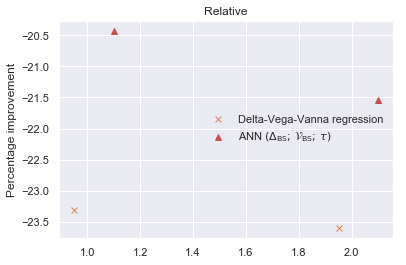

In [29]:
for col in kws[1:]:
    y = (res[col[0]] - res['Regression/BS_Benchmark']) / res['Regression/BS_Benchmark']
    plt.plot(np.arange(1, NUM_PERMUTE+1)+col[3], y*100, marker=col[2], linewidth=0, label=col[1], color=col[4])
plt.legend(frameon=False)
plt.ylabel('Percentage improvement')
plt.title('Relative')

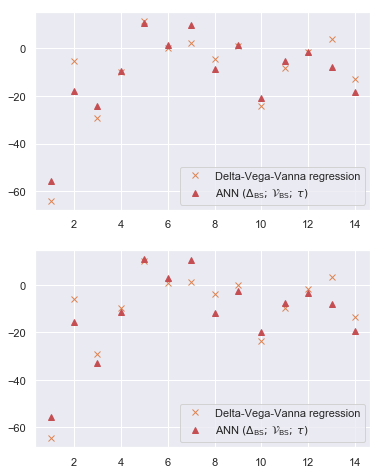

In [30]:
"""
This plots the change in the percentage improvement of the two statistical models 
compared to the BS-Delta, window by window in each of the 5 permutations.
"""
localins = cm.LocalInspector(dirs_dict)

df_rela_diff = pd.DataFrame(np.zeros((14, 2)), 
                            index=range(0, 14), columns=['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega'])
three_cols = ['Regression/BS_Benchmark', 'Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']
df_abs = pd.DataFrame(np.zeros((14, 3)), index=range(0, 14), columns=three_cols)
fig, axes = plt.subplots(ncols=1, nrows=NUM_PERMUTE, figsize=(6, 4*NUM_PERMUTE))
for i in range(NUM_PERMUTE):
    localins.load_real_pnl(idx=i)
    res = localins.compare_period()[three_cols]
    bs_tmp = res['Regression/BS_Benchmark'].values[:, np.newaxis]
    permute_rela = (res[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp
    
    df_rela_diff += permute_rela - base_rela
    y = (permute_rela - base_rela)*100
    for x in kws[1:]:
        if (NUM_PERMUTE == 1):
            axes.plot(np.arange(1, 15), y[x[0]], marker=x[2], linewidth=0, label=x[1], color=x[4])
            axes.legend()
        else:
            axes[i].plot(np.arange(1, 15), y[x[0]], marker=x[2], linewidth=0, label=x[1], color=x[4])
            axes[i].legend()
    df_abs += res

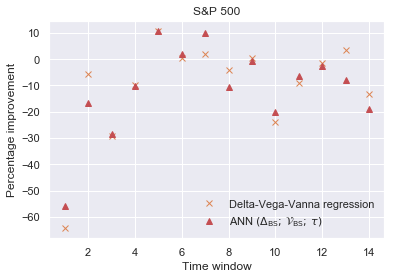

In [31]:
avg = df_rela_diff / NUM_PERMUTE
for x in kws[1:]:
    plt.plot(range(1, len(avg)+1), avg[x[0]]*100, marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Percentage improvement')
plt.title('S&P 500')

rela_diff_avg_pmt_vix = avg

Text(0.5, 1.0, 'S&P 500')

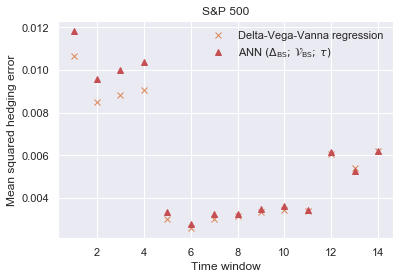

In [32]:
avg = df_abs / NUM_PERMUTE
for x in kws[1:]:
    plt.plot(range(1, len(avg)+1), avg[x[0]], marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Mean squared hedging error')
plt.title('S&P 500')

Text(0.5, 1.0, 'S&P 500 (1 day)')

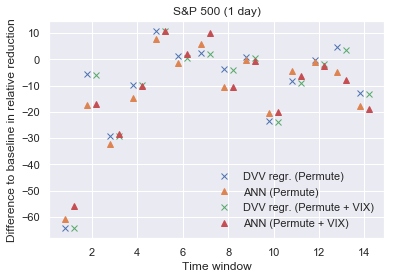

In [33]:
""" 
Combined plot of the change in the percentage improvement of the two statistical hedging model 
in the Permute and Permute + VIX experiments.
"""
fig, ax = plt.subplots()

kws_tmp = [('Regression/Delta_Vega_Vanna', 'DVV regr. (Permute)', 'x', -0.2),
 ('Network/Delta_Vega', 'ANN (Permute)', '^', -0.2)]

for x in kws_tmp:
    ax.plot(rela_diff_avg_pmt.index + 1 + x[3], rela_diff_avg_pmt[x[0]]*100, label=x[1], marker=x[2], linewidth=0)

kws_tmp = [('Regression/Delta_Vega_Vanna', 'DVV regr. (Permute + VIX)', 'x', 0.2),
         ('Network/Delta_Vega', 'ANN (Permute + VIX)', '^', 0.2)]  
for x in kws_tmp:
    ax.plot(rela_diff_avg_pmt_vix.index + 1 + x[3], rela_diff_avg_pmt_vix[x[0]]*100, label=x[1], marker=x[2], linewidth=0)
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Difference to baseline in relative reduction')
plt.title("S&P 500 (1 day)")